# Interpretation of Best Models
Our baseline is a Logistic Regression classifier with a single feature (evictions the previous year) and the default parameters.   
Our best classifier is a Gradient Boosting with the following parameters: 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5.  
Our best regressor is a Decision Tree with the following parameters: 'max_depth': 50, 'max_features': None, 'min_samples_split': 10. 

This notebook produces additional deliverables upon selecting these models. This includes the following: 

For the baseline classifier: 
- A "stump" one-level decision tree ('stump.png')``
- The list of the top 14% of selected blocks ('baseline_selected_blocks.csv')
- The precision-recall curves ('baseline_pr_curve.png') 

For the best classifier: 
- The list of the top 14% selected blocks ('clf_selected_blocks.csv') 
- The list of feature importance ('clf_feature_importance.csv')
- The precision-recall curves ('clf_pr_curve.png')

For the best regressor: 
- The list of the top 14% selected blocks ('reg_selected_blocks.csv')
- The list of feature importance ('reg_feature_importance.csv')

And to compare the best classifier and best regressor: 
- The list of the top 14% blocks based on actual evictions, and the predictions yielded from the best classifier and best regressor for these blocks ('clf_reg_comparison.csv')

## Environment Setup

In [1]:
import pandas as pd
from os import path
from IPython.display import Image
import pipeline
from pipeline import analyze_best_model
from pipeline import clean 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## Pipeline Setup

In [2]:
df = pd.read_csv('data/final_merged_df.csv')

splits = pipeline.split_all_years(df, colname='year_evictions')
cleaned_splits = [pipeline.clean_split(split) for split in splits]
labeled_splits = [pipeline.label(split, lower_bound=15, drop_column=True)
                  for split in cleaned_splits]

test_year = 2011
splits_dict = {2011:0, 2012:1, 2013:2, 2014:3, 2015: 4, 2016: 5}
train_df, test_df = labeled_splits[splits_dict[test_year]] 

## Baseline Classifier
Logistic Regression classifier with a single feature (evictions the previous year) and the default parameters.   

In [3]:
params = {}
baseline_model, baseline_scores = pipeline.run_one_clf(
    train_df, test_df, 'LB', params, col_blacklist=['GEOID', 'year_evictions'])

#### "Stump" Decision Tree 

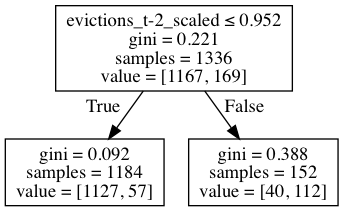

In [4]:
params = {'max_depth': 1}
dtree, dtree_scores = pipeline.run_one_clf(
    train_df, test_df, 'DT', params, col_blacklist=['GEOID', 'year_evictions'])
analyze_best_model.plot_tree(dtree, test_df, 'stump.png', test_year )
Image(filename=path.join('results', str(test_year), 'stump.png')) 

#### Selected Blocks

In [5]:
selected_blocks = analyze_best_model.select_k_blocks(baseline_scores, .14 , ['score'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'baseline_selected_blocks.csv'), index=False)
selected_blocks.head(10)

,GEOID
5307,421010239002
6210,421010273003
6973,421010301002
8653,421010361001
5384,421010243002
6098,421010268001
8933,421010373003
8310,421010346001
904,421010036003
5356,421010242002


#### Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

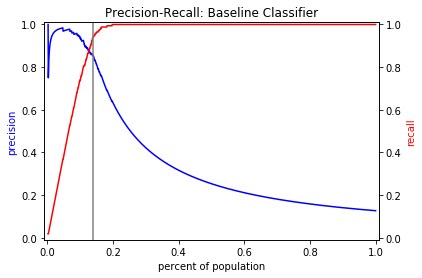

In [6]:
pipeline.plot_precision_recall_n(
    baseline_scores, .14, 'Precision-Recall: Baseline Classifier', 'baseline_pr_curve.png', test_year)

## Best Classifier
Gradient Boosting with the following parameters: 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5.  

In [7]:
params = {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}
best_clf, clf_scores = pipeline.run_one_clf(
    train_df, test_df, 'GB', params, col_blacklist=['GEOID', 'year_evictions'])

#### Selected Blocks

In [8]:
selected_blocks = analyze_best_model.select_k_blocks(clf_scores, .14 , ['score'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'clf_selected_blocks.csv'), index=False)
selected_blocks.head(10)

,GEOID
7036,421010305011
4551,421010192004
8506,421010353021
6210,421010273003
8674,421010362011
5286,421010238004
5356,421010242002
7141,421010307001
8933,421010373003
4299,421010179004


#### Precision-Recall Curves

<Figure size 432x288 with 0 Axes>

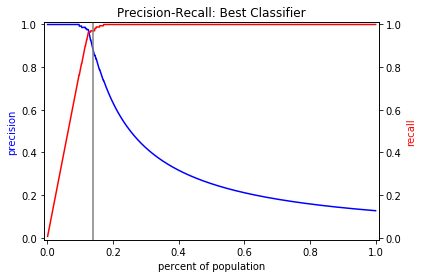

In [9]:
pipeline.plot_precision_recall_n(
    clf_scores, .14, 'Precision-Recall: Best Classifier', 'clf_pr_curve.png', test_year)

#### Feature Importance

In [10]:
importance = analyze_best_model.feature_importance(best_clf, test_df.columns)
importance.to_csv(path.join('results', str(test_year), 'clf_feature_importance.csv'), index=False)
importance.head(10).round(2)

,feature,importance
65,evictions_t-2_scaled,0.40
64,evictions_t-1_scaled,0.17
3,evictions_change_1,0.12
4,evictions_change_2,0.12
66,evictions_t-5_scaled,0.04
5,evictions_change_5,0.04
73,median_gross_rent_scaled,0.01
14,black_alone_owner_occupied_percent,0.01
72,renter_occupied_household_size_scaled,0.01
82,black_alone_owner_occupied_scaled,0.01


## Best Regressor
Decision Tree with the following parameters: 'max_depth': 50, 'max_features': None, 'min_samples_split': 10.

In [11]:
train_df, test_df = cleaned_splits[splits_dict[test_year]] 
params = {'max_depth': 50, 'max_features': None, 'min_samples_split': 10}
best_reg, reg_scores = pipeline.run_one_reg(
    train_df, test_df, 'DTR', params, col_blacklist=['GEOID', 'year_evictions'])

#### Selected Blocks

In [12]:
selected_blocks = analyze_best_model.select_k_blocks(reg_scores, .14 , ['pred_evictions'], ['GEOID'])
selected_blocks.to_csv(path.join('results', str(test_year), 'reg_selected_blocks_clf.csv'), index=False)
selected_blocks.head(10)

,GEOID
904,421010036003
1513,421010069001
5307,421010239002
5384,421010243002
6098,421010268001
6210,421010273003
6973,421010301002
8653,421010361001
8933,421010373003
2241,421010092001


#### Feature Importance

In [13]:
importance = analyze_best_model.feature_importance(best_reg, test_df.columns)
importance.to_csv(path.join('results', str(test_year), 'reg_feature_importance.csv'), index=False)
importance.head(10).round(2)

,feature,importance
64,evictions_t-1_scaled,0.61
65,evictions_t-2_scaled,0.17
4,evictions_change_2,0.09
3,evictions_change_1,0.08
19,evictions_change_2_binary,0.04
76,occupied_units_scaled,0.00
66,evictions_t-5_scaled,0.00
20,evictions_change_5_binary,0.00
71,total_renter_households_scaled,0.00
79,num_af_am_alone_scaled,0.00


## Comparing Best Classifier and Best Regressor

In [14]:
comparison = analyze_best_model.clf_reg_comparison(
    best_clf, clf_scores, best_reg, reg_scores, test_df, .14)
comparison.to_csv(path.join('results', str(test_year), 'clf_reg_comparison.csv'), index=False)
comparison.head(10).round(2)

,GEOID,actual_evictions,clf_pred_score,reg_pred_evictions
0,421010273003,95.0,1.0,65.50
1,421010301002,83.0,1.0,65.50
2,421010239002,76.0,1.0,65.50
3,421010238004,66.0,1.0,42.78
4,421010243002,55.0,1.0,65.50
5,421010242002,54.0,1.0,42.78
6,421010373003,53.0,1.0,65.50
7,421010305011,48.0,1.0,34.20
8,421010268001,46.0,1.0,65.50
9,421010301001,46.0,1.0,42.78
